In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU

In [ ]:
df= pd.read_csv('dados_360s_5.csv')


In [ ]:


x0= df[['time']].values
y0= df[['output']].values # saida controlador
s0= df[['setpoint']].values
p0= df[['process']].values # saida da planta


In [ ]:
df_max_scaled = df.copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
#display(df_max_scaled)
y5 = []
p5 = []
x5 = []
s5 = []
j=0
for j in range(len(y0)):
    y= (y0[j]) / y0.max()
    x= (x0[j]) / x0.max()
    s= (s0[j]) / s0.max()
    p= (p0[j]) / p0.max()
    y5.append(y)
    p5.append(p)
    s5.append(s)
    x5.append(x)

p6 = []
s6 = []
x6 = []
y6 = []
j=0
for j in range(len(y0)):
    ya=  (y5[j])* y0.max()
    xa = (x5[j])* x0.max()
    sa = (s5[j])* s0.max()
    pa = (p5[j])* p0.max()
    y6.append(ya)
    p6.append(pa)
    s6.append(sa)
    x6.append(xa)


#display(df_max_scaled)
x3= df_max_scaled['time'].values
#x3= df_max_scaled['time'].values
y3= df_max_scaled['output'].values
s3= df_max_scaled['setpoint'].values
p3= df_max_scaled['process'].values


df_desnormalizado = df_max_scaled.copy()
for column in df_desnormalizado:
    df_desnormalizado[column] = 2*df_max_scaled[column].abs().max()* df_max_scaled[column]

x4= df_desnormalizado['time'].values
y4= df_desnormalizado['output'].values
s4= df_desnormalizado['setpoint'].values
p4= df_desnormalizado['process'].values

#scaler_x= StandardScaler()
scaler_y= StandardScaler()
scaler_s= StandardScaler()
scaler_p= StandardScaler()

#x1= scaler_x.fit_transform(x0)
y1= scaler_y.fit_transform(y0)
s1 = scaler_s.fit_transform(s0)
p1 = scaler_p.fit_transform(p0)


import csv

with open('normal.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["setpoint", "process", "output"])
    for i in range(len(p1)):
        writer.writerow([float(s5[i]), float(p5[i]), float(y5[i])])


nrml= pd.read_csv('normal.csv')
x2= nrml.iloc[:, 0:2].values
y2 = nrml.iloc[:,2].values

Epoch 1/10
535/535 [==============================] - 2s 2ms/step - loss: 0.0128 - mae: 0.0511 - mse: 0.0128
Epoch 2/10
535/535 [==============================] - 2s 3ms/step - loss: 0.0018 - mae: 0.0281 - mse: 0.0018
Epoch 3/10
535/535 [==============================] - 2s 3ms/step - loss: 0.0018 - mae: 0.0289 - mse: 0.0018
Epoch 4/10
535/535 [==============================] - 2s 3ms/step - loss: 0.0017 - mae: 0.0275 - mse: 0.0017
Epoch 5/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0016 - mae: 0.0267 - mse: 0.0016
Epoch 6/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0015 - mae: 0.0268 - mse: 0.0015
Epoch 7/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0015 - mae: 0.0255 - mse: 0.0015
Epoch 8/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0015 - mae: 0.0255 - mse: 0.0015
Epoch 9/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0014 - mae: 0.0254 - mse: 0.0014
Epoch 10/10
535/535

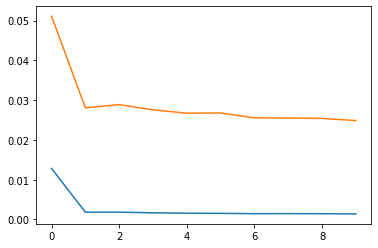

563/563 [==============================] - 1s 1ms/step


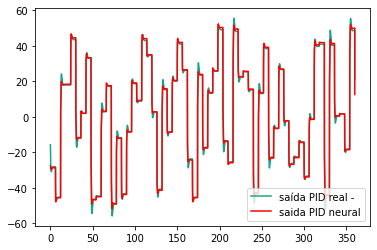

29/29 [==============================] - 0s 2ms/step


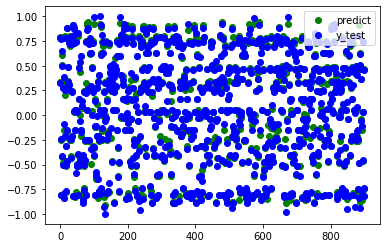

Saved model


In [ ]:
porcentagem= 0.05
x_train, x_test, y_train, y_test = train_test_split(x2,y2,test_size= porcentagem, random_state=1)
#keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

model= Sequential() #modelo
model.add(Dense(units=10,activation='sigmoid', input_dim = 2)) #criou camada oculta

#model.add(BatchNormalization())
#model.add(Dropout(0.001))
#model.BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None)# Mais utilizada atualmente, pois melhora o tempo de computação. z

model.add(Dense(units=20,activation='relu')) #criou camada oculta
model.add(Dense(units=50,activation='relu')) #criou camada oculta
model.add(Dense(units=100,activation='relu')) #criou camada oculta

model.add(Dense(units=200,activation='relu')) #criou camada oculta

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',  metrics=['mae', 'mse'])
# mse: escolha padrão para problemas de regressão. Dando a importância maior aos erros, pois o eleva ao quadrado.
# optimizer: método para otimizar a função a função loss e chegar nos pesos ideais. Sgd: calcula o gradiente através de subconjuntos batches.
epocas= 10
history=model.fit(x_train, y_train, epochs=  epocas)

plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
print(history.history['mse'][epocas-1])
#print(history.history['acc'])

plt.show()
result= model.predict(x2)

result1= scaler_y.inverse_transform( model.predict(x2) )
#result2= scaler_y.inverse_transform( model.predict(x_test) )
out=[]
for j in range(len(y0)):
    y= (result[j])* y0.max()
    out.append(y)


s4 = scaler_s.inverse_transform(y1)
p4 = scaler_p.inverse_transform(p1)

plt.plot(x0, y0, color='#17a589', label= 'saída PID real -') # green
plt.plot(x0, out, color='red', label='saida PID neural')
plt.legend()
plt.show()

plt.plot(model.predict(x_test),'go', label= 'predict') # green
plt.plot(y_test,'bo', label='y_test')
plt.legend()
plt.show()

model.save("model_rede_3.h5")
print("Saved model")
